# Data analysis - Tanimoto Similarity Score

The relationships among NRAS ligands were examined using the Tanimoto similarity score. This score measures the proportion of shared chemical substructures between two molecules. The calculation involved the following steps:
1. Morgan fingerprints were determined for each molecule using RDKit.
2. The Tanimoto similarity was then computed based on these fingerprints.
3. Tanimoto similarity values range from 0 to 1, where 0 indicates the lowest similarity (no shared substructures) and 1 indicates the highest similarity (all substructures are shared).

In [2]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd

#load file with NRAS ligands
df = pd.read_csv('../Data/Dataset_Positive.csv')

# create an empty list
results = []

# lop of all the possible combinations
for i in range(len(df)):
    mol1 = Chem.MolFromSmiles(df.loc[i, 'SMILES'])
    fp1 = Chem.RDKFingerprint(mol1)
    
    for j in range(i+1, len(df)):
        mol2 = Chem.MolFromSmiles(df.loc[j, 'SMILES'])
        fp2 = Chem.RDKFingerprint(mol2)
        
        similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        results.append((i, j, similarity))

# creat dataset with 
columns = ['Mol1', 'Mol2', 'Similarity']
df_results = pd.DataFrame(results, columns=columns)

print(df_results)

#save results
df_results.to_csv('../Results/similarity.csv', index=False)


        Mol1  Mol2  Similarity
0          0     1    0.954669
1          0     2    0.938462
2          0     3    0.770980
3          0     4    0.889984
4          0     5    0.948649
...      ...   ...         ...
166748   574   576    0.879493
166749   574   577    0.523710
166750   575   576    0.898721
166751   575   577    0.521288
166752   576   577    0.515910

[166753 rows x 3 columns]


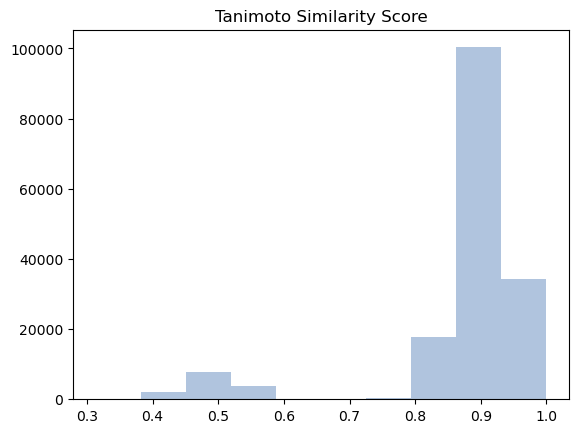

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.read_csv('../Results/similarity.csv')

fig, ax = plt.subplots()
ax.hist(df_results['Similarity'], color = "lightsteelblue")
ax.set_title('Tanimoto Similarity Score')

plt.savefig('../Results/Figures/Tanimoto_Hist.png', dpi=300) # saving the plot

plt.show()

## Tanimoto Similarity Headmap

        Mol1  Mol2  Similarity  Cluster
0          0     1    0.954669        0
1          0     2    0.938462        0
2          0     3    0.770980        0
3          0     4    0.889984        0
4          0     5    0.948649        0
...      ...   ...         ...      ...
166748   574   576    0.879493        0
166749   574   577    0.523710        1
166750   575   576    0.898721        0
166751   575   577    0.521288        1
166752   576   577    0.515910        1

[166753 rows x 4 columns]


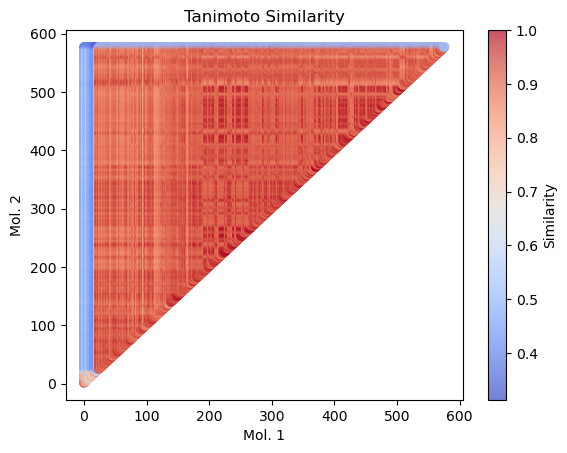

In [4]:
from sklearn.cluster import KMeans

# Create a feature matrix for clustering
X = df_results[['Similarity']]

# Create a KMeans object with the desired number of clusters
n_clusters = 2  #we have seen that we have two different groups of molecules 
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(X)

# Get the cluster labels assigned to each molecule
labels = kmeans.labels_

# Add cluster tags to the original DataFrame
df_results['Cluster'] = labels
print(df_results)

# Create the scatter plot
plt.scatter(df_results['Mol1'], df_results['Mol2'], c=df_results['Similarity'], cmap='coolwarm', alpha=0.7)

plt.title('Tanimoto Similarity')
plt.xlabel('Mol. 1')
plt.ylabel('Mol. 2')
plt.colorbar(label='Similarity')

plt.savefig('../Results/Figures/Tanimoto_HeadMap.png', dpi=300) # saving the plot

plt.show()